In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import sys, os

In [2]:
# Sample configuration
num_samples = 100000

In [3]:
# Intrasample configuration
num_elements = 1
interval_per_element = 0.01
total_num_elements = int(num_elements / interval_per_element)
starting_point = int(0 - 0.5*total_num_elements)

In [4]:
# Other configuration
num_samples_visualize = 1

## Sinosodial signal and white noise

Mean spectral noise density =  0.9805155776716589 arb.u/SQRT(Hz)


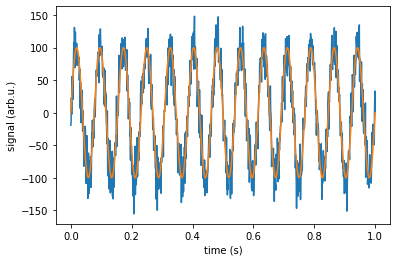

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

"""
parameters: 
rhp - spectral noise density unit/SQRT(Hz)
sr  - sample rate
n   - no of points
mu  - mean value, optional

returns:
n points of noise signal with spectral noise density of rho
"""
def white_noise(rho, sr, n, mu=0):
    sigma = rho * np.sqrt(sr/2)
    noise = np.random.normal(mu, sigma, n)
    return noise

rho = 1 
sr = 1000
n = 1000
period = n/sr
time = np.linspace(0, period, n)
signal_pure = 100*np.sin(2*np.pi*13*time)
noise = white_noise(rho, sr, n)
signal_with_noise = signal_pure + noise

f, psd = signal.periodogram(signal_with_noise, sr)

print("Mean spectral noise density = ",np.sqrt(np.mean(psd[50:])), "arb.u/SQRT(Hz)")

plt.plot(time, signal_with_noise)
plt.plot(time, signal_pure)
plt.xlabel("time (s)")
plt.ylabel("signal (arb.u.)")
plt.show()

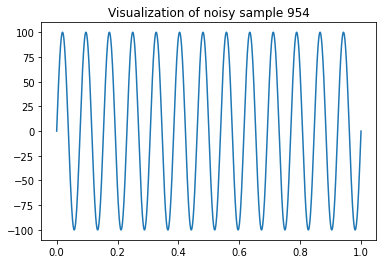

In [6]:
# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, n-1)
  x_axis, y_axis = time, signal_pure
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of noisy sample {random_index}')
  plt.show()

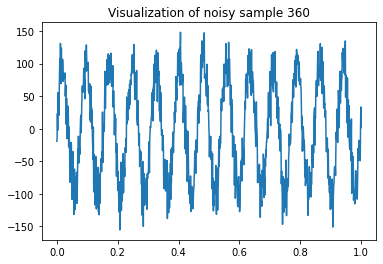

In [7]:
# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, n-1)
  x_axis, y_axis = time, signal_with_noise
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of noisy sample {random_index}')
  plt.show()

(150,)


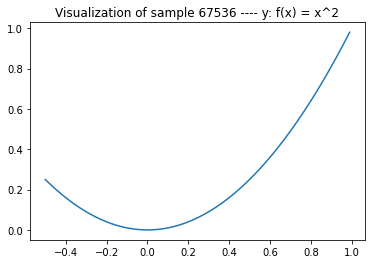

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Sample configuration
num_samples = 100000

# Intrasample configuration
num_elements = 1
interval_per_element = 0.01
total_num_elements = int(num_elements / interval_per_element)
starting_point = int(0 - 0.5*total_num_elements)

# Other configuration
num_samples_visualize = 1

# Containers for samples and subsamples
samples = []
xs = []
ys = []

# Generate samples
for j in range(0, num_samples):
  # Report progress

  # Generate wave
  for i in range(starting_point, total_num_elements):
    x_val = i * interval_per_element
    y_val = x_val * x_val
    xs.append(x_val)
    ys.append(y_val)
  # Append wave to samples
  samples.append((xs, ys))
  # Clear subsample containers for next sample
  xs = []
  ys = []

# Input shape
print(np.shape(np.array(samples[0][0])))
  
# Save data to file for re-use
np.save('./signal_waves_medium.npy', samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, len(samples)-1)
  x_axis, y_axis = samples[random_index]
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of sample {random_index} ---- y: f(x) = x^2')
  plt.show()

(150,)


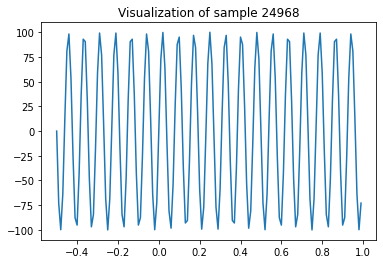

In [106]:
# Sample configuration
num_samples = 100000

# Intrasample configuration
num_elements = 1
interval_per_element = 0.01
total_num_elements = int(num_elements / interval_per_element)
starting_point = int(0 - 0.5*total_num_elements)

# Other configuration
num_samples_visualize = 1

# Containers for samples and subsamples
samples = []

xs = []
ys = []
time = np.linspace(0, period, n)
# Generate samples
for j in range(0, num_samples):
  # Report progress

  # Generate wave
  for i in range(starting_point, total_num_elements):
    x_val =  i*interval_per_element
    y_val = 100*np.sin(2*np.pi*13*x_val)
    
    xs.append(x_val)
    ys.append(y_val)
  # Append wave to samples
  samples.append((xs, ys))
  # Clear subsample containers for next sample
  xs = []
  ys = []

# Input shape
print(np.shape(np.array(samples[0][0])))
  
# Save data to file for re-use
np.save('./signal_waves_medium.npy', samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, len(samples)-1)
  x_axis, y_axis = samples[random_index]
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of sample {random_index}')
  plt.show()

In [48]:
!ls


bin	 datalab  home	 lib64	opt	    root  srv		     tmp    var
boot	 dev	  lib	 media	proc	    run   sys		     tools
content  etc	  lib32  mnt	python-apt  sbin  tensorflow-1.15.2  usr


(150,)


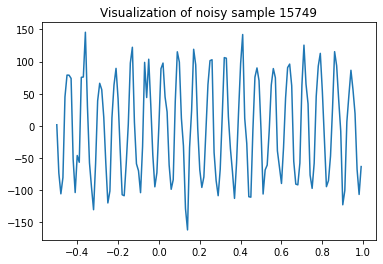

In [107]:
# Sample configuration
num_samples_visualize = 1
noise_factor = 0.05

# Load data
data = np.load('./signal_waves_medium.npy')
x_val, y_val = data[:,0], data[:,1]
sr = 1000
sigma = 1 * np.sqrt(sr/2)

# Add noise to data

noisy_samples = []
noise = white_noise(1, sr, num_samples)
for i in range(0, len(x_val)):

  pure = np.array(y_val[i])
  noise = np.random.normal(0, sigma, pure.shape)
  signal = pure + noise
  noisy_samples.append([x_val[i], signal])

#noise shape
print(np.shape(np.array(noisy_samples[0][0])))  
# Save data to file for re-use
np.save('./signal_waves_noisy_medium.npy', noisy_samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, len(noisy_samples)-1)
  x_axis, y_axis = noisy_samples[random_index]
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of noisy sample {random_index}')
  plt.show()

0.99

In [108]:
pip install tensorflow==2.4.0

In [109]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Conv1DTranspose
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
import numpy as np
import math



In [121]:
# Model configuration
input_shape = (150,1 )
batch_size = 150
no_epochs = 6
train_test_split = 0.3
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0

In [111]:
# Load data
data_noisy = np.load('./signal_waves_noisy_medium.npy')
x_val_noisy, y_val_noisy = data_noisy[:,0], data_noisy[:,1]
data_pure = np.load('./signal_waves_medium.npy')
x_val_pure, y_val_pure = data_pure[:,0], data_pure[:,1]

In [70]:

#x_val_noisy, y_val_noisy = time, signal_with_noise

#x_val_pure, y_val_pure = time, signal_pure

In [112]:
x_val_noisy.shape

(100000, 150)

In [113]:
# Reshape data
y_val_noisy_r = []
y_val_pure_r = []
for i in range(0, len(y_val_noisy)):
  noisy_sample = y_val_noisy[i]
  pure_sample = y_val_pure[i]
  noisy_sample = (noisy_sample - np.min(noisy_sample)) / (np.max(noisy_sample) - np.min(noisy_sample))
  pure_sample = (pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample))
  y_val_noisy_r.append(noisy_sample)
  y_val_pure_r.append(pure_sample)
y_val_noisy_r   = np.array(y_val_noisy_r)
y_val_pure_r    = np.array(y_val_pure_r)
noisy_input     = y_val_noisy_r.reshape((y_val_noisy_r.shape[0], y_val_noisy_r.shape[1], 1))
pure_input      = y_val_pure_r.reshape((y_val_pure_r.shape[0], y_val_pure_r.shape[1], 1))

In [114]:
y_val_noisy_r.shape

(100000, 150)

In [115]:
# Train/test split
percentage_training = math.floor((1 - train_test_split) * len(noisy_input))
noisy_input, noisy_input_test = noisy_input[:percentage_training], noisy_input[percentage_training:]
pure_input, pure_input_test = pure_input[:percentage_training], pure_input[percentage_training:]

In [119]:
# Create the model
model = Sequential()
model.add(Conv1D(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 148, 128)          512       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 146, 32)           12320     
_________________________________________________________________
conv1d_transpose_6 (Conv1DTr (None, 148, 32)           3104      
_________________________________________________________________
conv1d_transpose_7 (Conv1DTr (None, 150, 128)          12416     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 150, 1)            385       
Total params: 28,737
Trainable params: 28,737
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input, pure_input,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

Epoch 1/6
374/374 [==============================] - 10s 24ms/step - loss: 0.3931 - val_loss: 0.3906
Epoch 2/6
374/374 [==============================] - 9s 23ms/step - loss: 0.3906 - val_loss: 0.3906
Epoch 3/6
374/374 [==============================] - 9s 23ms/step - loss: 0.3906 - val_loss: 0.3905
Epoch 4/6
374/374 [==============================] - 9s 23ms/step - loss: 0.3906 - val_loss: 0.3907
Epoch 5/6
374/374 [==============================] - 9s 23ms/step - loss: 0.3906 - val_loss: 0.3905
Epoch 6/6
374/374 [==============================] - 9s 23ms/step - loss: 0.3906 - val_loss: 0.3905


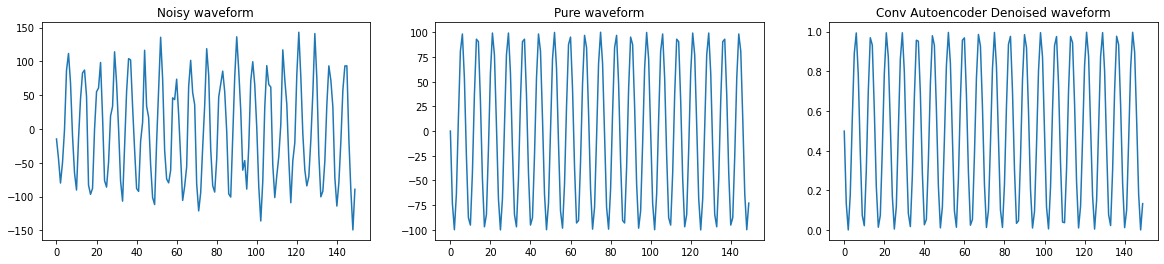

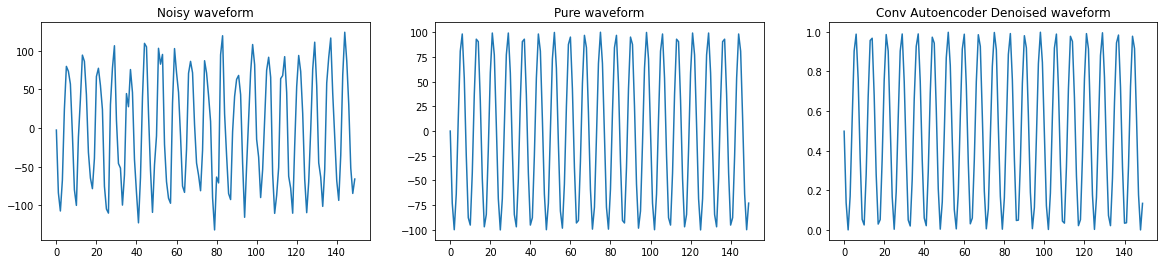

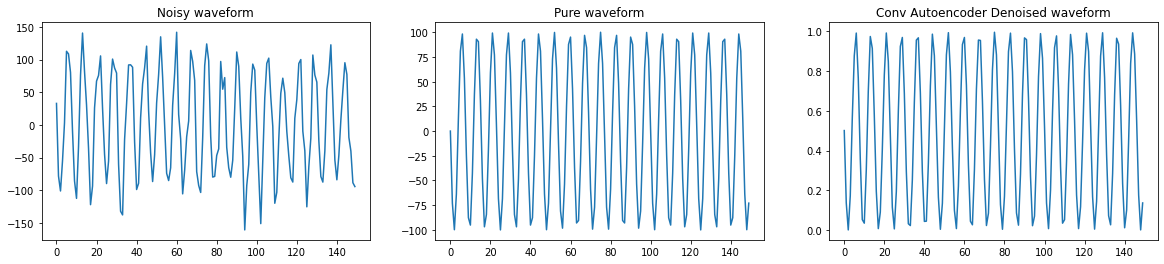

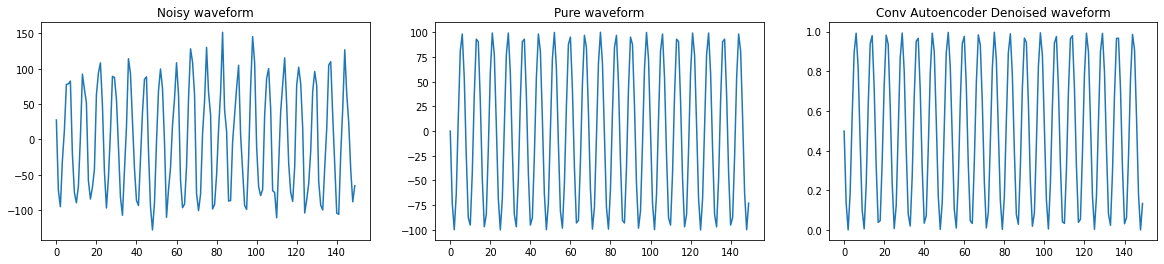

In [126]:
# Generate reconstructions
num_reconstructions = 4
samples = noisy_input_test[:num_reconstructions]
reconstructions = model.predict(samples)

# Plot reconstructions
for i in np.arange(0, num_reconstructions):
  # Prediction index
  prediction_index = i + percentage_training
  # Get the sample and the reconstruction
  original = y_val_noisy[prediction_index]
  pure = y_val_pure[prediction_index]
  reconstruction = np.array(reconstructions[i])
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3,figsize=(20,4))
  # Plot sample and reconstruciton
  axes[0].plot(original)
  axes[0].set_title('Noisy waveform')
  axes[1].plot(pure)
  axes[1].set_title('Pure waveform')
  axes[2].plot(reconstruction)
  axes[2].set_title('Conv Autoencoder Denoised waveform')
  plt.show()